<h2 align='center'> Tugas Minggu 3 Deep Learning </h2>
<br>
<hr>
<br>
Nama: Muh. Yusuf Syam
<br>
NIM: H071191044
<br>
Soal: Pelajari <a href='https://d2l.ai/chapter_deep-learning-computation/index.html'> Chapter 5 dari d2l.ai : Deep Learning Computation <a/>

In [1]:
import tensorflow as tf
from tensorflow import keras

### 1. Layer dan Blocks

Layer merupakan arsitektur atau struktur yang berisi kumpulan node yang beroperasi secara dan di waktu yang bersamaan, yang mengambil informasi dari layer sebelumnya dan kemudian meneruskan informasi ke layer berikutnya. 
<br><br>
Block atau neural network blocks merupakan konsep di mana satu atau lebih layer digambarkan / diabstraksi menjadi satu komponen (block). Salah satu manfaat utama dari abstraksi blocks adalah blocks ini bisa lagi dikombinasikan menjadi struktur yang lebih besar (biasanya secara rekursif).

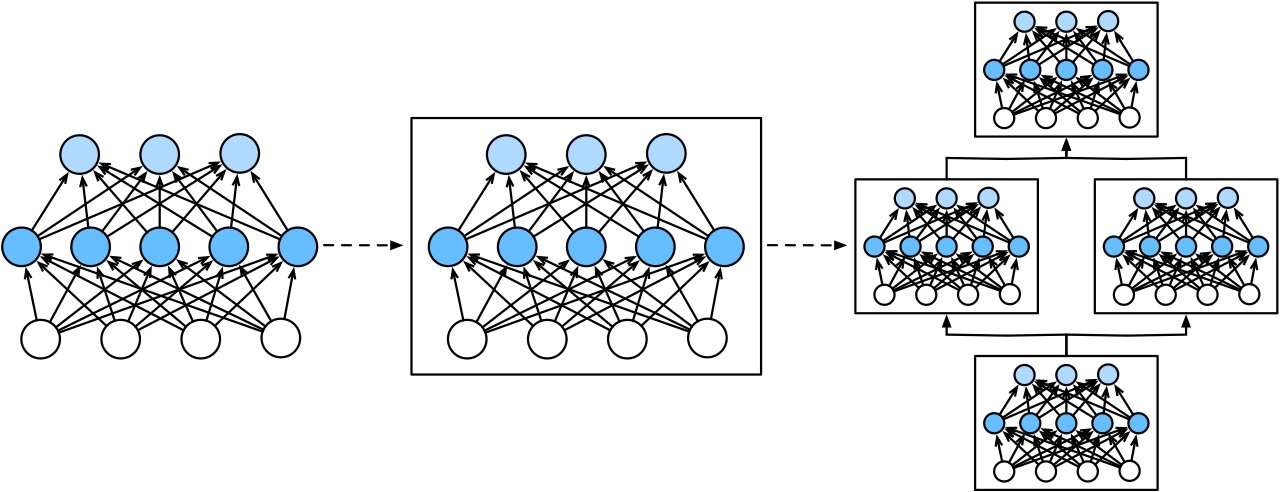

Dengan menggunakan konsep blocks ini, kita tetap dapat menulis kode yang ringkas dan masih mengimplementasikan neural net yang kompleks. Untuk mengimplementasikan blocks, kita membuat fungsi atau jika ingin fleksibel,  kelas turunan dari tensorflow.keras.Model yang memiliki fungsi forward propagation (fungsi call()) . Contoh implementasi kode

In [2]:
# Data: digenerate secara random
X = tf.random.uniform((2, 20))

X

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[0.01712358, 0.35493946, 0.5405338 , 0.79611206, 0.5256866 ,
        0.26923382, 0.8012898 , 0.5970168 , 0.7580904 , 0.223297  ,
        0.05137169, 0.5487536 , 0.9670843 , 0.9176626 , 0.80756927,
        0.7335526 , 0.4240048 , 0.5724329 , 0.6519947 , 0.6005275 ],
       [0.671363  , 0.4158187 , 0.15335965, 0.29671204, 0.0254463 ,
        0.0706296 , 0.3380202 , 0.9947419 , 0.91518116, 0.7797818 ,
        0.07685912, 0.66538835, 0.30794978, 0.7156807 , 0.89525604,
        0.00596428, 0.9859512 , 0.01990163, 0.8333669 , 0.59925926]],
      dtype=float32)>

Misalnya model yang akan dijadikan blok merupakan model seperti ini

In [3]:
block1 = keras.models.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10),
])

Bentuk bloknya:

In [6]:
class Block1(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer_list= []
        self.layer_list.append(keras.layers.Dense(256, activation=tf.nn.relu))
        self.layer_list.append(keras.layers.Dense(10))
        self.layer_list.reverse()
    
    def call(self, X):
        result_temp= X

        # Melakukan forward propagation sampai layer terakhir dalam list 
        while bool(self.layer_list):
            result_temp= self.layer_list.pop()(result_temp)

        return result_temp
        # return 1

In [7]:
net= Block1()
net(X) # Sama saja dengan net.call(X)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.11961596,  0.16114475, -0.05194288,  0.07795946, -0.00589785,
         0.11917223, -0.37781316,  0.00727668, -0.3132152 ,  0.08739137],
       [-0.3573739 , -0.005401  ,  0.31881526,  0.03776542, -0.04524694,
         0.36146536, -0.20566866, -0.01114096, -0.3220052 ,  0.02109889]],
      dtype=float32)>

Selanjutnya kita akan membuat block ke dua yang tidak mengandung layer satu per satu tapi mengandung model

In [8]:
class Block2(keras.Model):
    def __init__(self):
        super().__init__()
        self.net= keras.Sequential()
        self.net.add(keras.layers.Dense(256, activation=tf.nn.relu))
        self.net.add(keras.layers.Dense(10))
    
    def call(self, X):
        return self.net(X)

Kemudian disatukan bersama

In [9]:
net= keras.Sequential()

# Menambahkan layer pertama yang mana merupakan block 2
net.add(Block2())

# Menambahkan block 1
net.add(Block1())

# # Menambahkan satu lagi layer dense biasa
net.add(keras.layers.Dense(10, activation= 'sigmoid'))

# Melakukan forward propagation
net(X)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.57319707, 0.6185052 , 0.39009902, 0.41302484, 0.4568237 ,
        0.46131316, 0.47526878, 0.47434902, 0.57074004, 0.42763957],
       [0.551456  , 0.6064567 , 0.40693584, 0.40646663, 0.46150336,
        0.4962135 , 0.46816403, 0.4952707 , 0.5419489 , 0.44672066]],
      dtype=float32)>

### 2. Parameter Management

Parameter management atau manajemen parameter termasuk (Parameter dalam kasus neural network contohnya weight dan bias, fungsi loss atau learning rate merupakan hyperparameter):
* Mengakses parameter untuk debugging, diagnostik, dan visualisasi.
* Inisialisasi parameter.
* Berbagi parameter dengan komponen model lain. 

**Mengakses Parameter**

Model:

In [10]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1),
])

X = tf.random.uniform((2, 4))
net(X)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.4004253 ],
       [0.96401596]], dtype=float32)>

Mengambil weight dan bias dari setiap layer net

In [11]:
net.weights
# Atau net.get_weights()

[<tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.27793556,  0.6421301 ,  0.49583107,  0.64860576],
        [-0.10101223, -0.37516934, -0.40390384, -0.1949215 ],
        [ 0.46136647, -0.36849084,  0.46420306,  0.24525505],
        [ 0.68938476,  0.23782569, -0.11190677, -0.19567287]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[0.9378052 ],
        [0.47045255],
        [0.11285663],
        [0.4677261 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

Untuk mendapatkan parameter pada layer yang ingin diakses, dilakukan dengan memanggil atribut .layers[index dari layer] dari model sequential. Misal layer yang ingin diakses parameternya yaitu layer indeks ke-1

In [12]:
net.layers[1]

Selanjutnya untuk mengakses parameter weight dan bias

In [13]:
net.layers[1].weights

[<tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.27793556,  0.6421301 ,  0.49583107,  0.64860576],
        [-0.10101223, -0.37516934, -0.40390384, -0.1949215 ],
        [ 0.46136647, -0.36849084,  0.46420306,  0.24525505],
        [ 0.68938476,  0.23782569, -0.11190677, -0.19567287]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

Outputnya berupa array, indeks ke-0 merupakan weights, indeks ke-1 merupakan bias

Untuk layer yang berupa block (memiliki layer lagi di dalamnya), kita tetap bisa mengakses nya seperti ini:

net.layers[0].layers[1].layers[1].weights[1]

**Inisialisasi Parameter**

Secara default (untuk tensorflow), matriks weight diinisialisasikan berdasarkan range yang dikomputasi dari dimensi input dan output, sementara parameter bias mempunyai nilai default 0.
<br><br>
Misal menginisialisasi weight sebagai variabel random Gaussian dengan standar deviasi 0.01, dan menginisialisasi parameter bias dengan nilai 0.

In [14]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(1)
])

net(X)
net.layers[1].weights[0], net.layers[1].weights[1]

(<tf.Variable 'dense_11/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.00369484,  0.00979016,  0.0099919 , -0.00499977],
        [-0.00183999,  0.00709944,  0.00638833,  0.00833689],
        [ 0.00726843,  0.00472815, -0.00573192, -0.00525922],
        [-0.00163482,  0.00320402, -0.00503862, -0.01748758]],
       dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>)

Kita juga bisa menginisialisasikan weight yang berbeda pada setiap layer, misal weight layer dense kedua diisi dengan angka konstan 0.5.

In [15]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=keras.initializers.Constant(0.5), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(1)
])

net(X)
net.layers[1].weights[0], net.layers[2].weights[0]

(<tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.00369854,  0.01927054, -0.00264826,  0.01085768],
        [ 0.00212952,  0.00886908,  0.00326237, -0.01801695],
        [ 0.0081156 ,  0.00470674, -0.01614598,  0.00613632],
        [-0.00138553,  0.00445084,  0.00582881,  0.01096614]],
       dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]], dtype=float32)>)

Kita juga bisa membuat subclass kita sendiri untuk inisialisasi weight jika cara di atas kurang flexibel, caranya yaitu kita membuat class subclass dari ```keras.initializers.Initializer``` , lalu mengimplementasikan method ```call(shape, dtype)``` yang me-return tensor (berisi weight inisial) yang isinya sesuai kemauan kita

In [16]:
# Di sini kita membuat class untuk inisialisasi weight
class MyInit(tf.keras.initializers.Initializer):
    def __call__(self, shape, dtype=None):
        data=tf.random.uniform(shape, -10, 10, dtype=dtype)
        factor=(tf.abs(data) >= 5)
        factor=tf.cast(factor, tf.float32)
        return data * factor

In [17]:
MyInit().__call__(shape=(3, 3), dtype=tf.float32)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-7.810116 ,  0.       ,  0.       ],
       [-0.       ,  0.       , -5.3934407],
       [-9.388413 , -5.31677  ,  0.       ]], dtype=float32)>

In [18]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    # Memasukkan kelas initializer pada parameter kernel_initializer
    keras.layers.Dense(4, activation=tf.nn.relu, kernel_initializer=MyInit()),
    keras.layers.Dense(1),
])

net(X)
print(net.layers[1].weights[0])

<tf.Variable 'dense_16/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[ 0.       ,  6.03648  ,  0.       ,  8.689022 ],
       [ 8.480272 , -0.       ,  0.       , -0.       ],
       [-0.       ,  0.       ,  0.       ,  0.       ],
       [ 0.       , -0.       , -9.390631 ,  5.6319885]], dtype=float32)>


### 3. Deferred Initialization

Inisialisasi weight pada model ditangguhkan sebelum data di-pass ke model. Ini dikarenakan model masih belum mengetahui input shape dari data, maka dari itu model menangguhkan inisialisasi parameter, konsep ini juga membuat kita tidak perlu mendefinisikan input shape dari setiap layer, yang mana pastinya sangat membantu terutama jika dataset berupa gambar (yang mana mempunyai shape yang dinamis)
<br><br>
Contohnya seperti kasus berikut, pertama-tama kita membuat model lalu memanggil weight nya

In [19]:
net = keras.models.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10),
])

In [20]:
[net.layers[i].get_weights() for i in range(len(net.layers))]

[[], []]

Kita bisa melihat weightnya masih kosong karena belum diinisialisasikan sama sekali

In [21]:
# Feed model dengan X
net(X)

[w.shape for w in net.get_weights()], net.layers[0].get_weights()[0]

([(4, 256), (256,), (256, 10), (10,)],
 array([[-0.0602693 ,  0.05960651, -0.00177021, ..., -0.04808182,
         -0.05508182, -0.03779377],
        [-0.03418624,  0.07676645,  0.10130423, ...,  0.04174006,
         -0.00849962,  0.01284373],
        [ 0.02702655, -0.02976343, -0.00404926, ..., -0.06943893,
          0.03697766,  0.00562552],
        [-0.01935379,  0.01983801, -0.11860908, ...,  0.1128118 ,
         -0.07439918,  0.03854588]], dtype=float32))

Barulah setelah data di-pass weightnya terinisialisasi. Ini dinamakan Deferred Initialization (penangguhan inisialisasi).

### 4. Custom Layers

Pada kasus-kasus tertentu, kita berhadapan dengan masalah di mana kita membutuhkan layer yang belum pernah dibuat atau belum ada pada library, untuk mengatasi masalah tersebut, kita bisa membuat layer kustom kita sendiri. Membuat layer kustom sama saja seperti membuat blok. Terdapat 2 jenis kustom layer: layer tanpa atau dengan parameter (seperti weight atau bias)

* **Layer tanpa parameter**


Layer tanpa parameter merupakan layer yang tidak mempunyai weight dan bias di dalamnya (seperti layer flatten). Misal kita ingin membuat layer yang mengurangi input dengan satu

In [22]:
class MinusOneLayer(keras.Model):
    def __init__(self):
        super().__init__()

    def call(self, input):
        return input - tf.ones(input.shape)

In [23]:
layer_wo_params= MinusOneLayer()
layer_wo_params(tf.constant([1.,2.,3.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 2.], dtype=float32)>

Mengimplementasikannya pada model

In [24]:
net = keras.Sequential([keras.layers.Dense(128), MinusOneLayer()])

* **Layer dengan parameter**

Layer dengan parameter mempunyai dan melibatkan weight dan bias pada operasinya. Misal kita ingin membuat layer dense yang berfungsi sama dengan layer dense pada umumnya (input * weight + bias lalu aktivasi). Walaupun kita mengatur/inisialisasi parameter semau kita, parameter juga tetap berubah saat proses back propagation

In [25]:
class MyDense(keras.Model):
    # Di sini kita berikan dua parameter saja yaitu untuk output dan aktivasi (tentu saja kita bisa menambahkannya sesuai kebutuhan)
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation= activation

    # Pada method build kita inisialisasi weight dan bias, fungsi build hanya dijalankan satu kali
    # Jadi weight dan bias tetap akan ter-update saat back propagation
    def build(self, X_shape):
        self.weight = self.add_weight(name='weight',
            shape=[X_shape[-1], self.units],
            initializer=tf.random_normal_initializer())
        self.bias = self.add_weight(
            name='bias', shape=[self.units],
            initializer=tf.zeros_initializer())

    # Pada fungsi call kita melakukan operasi (input * weight + bias lalu aktivasi)
    def call(self, X):
        linear = tf.matmul(X, self.weight) + self.bias

        if self.activation is None:
            return linear
        
        return self.activation(linear)

In [26]:
temp_dense= MyDense(5)
temp_dense(X)

temp_dense.get_weights()

[array([[ 0.00591938, -0.00752413,  0.04339367, -0.0227147 , -0.06484559],
        [ 0.03963706,  0.05126867, -0.0456691 , -0.0213722 , -0.08861297],
        [-0.01281285,  0.00693798, -0.01335908, -0.02094476, -0.00050469],
        [-0.09946736, -0.04665489, -0.00218333, -0.01649492,  0.07113609]],
       dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]

Selanjutnya membuat model dengan 2 layer ```MyDense``` yang telah dibuat

In [27]:
net= keras.Sequential([
    keras.layers.Flatten(),
    MyDense(128, tf.nn.relu), 
    MyDense(64, tf.nn.relu), 
    MyDense(32, tf.nn.relu), 
    MyDense(10, tf.nn.softmax)
])

net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Kita akan mengetes model tersebut pada dataset mnist

In [28]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()
x_train, x_test= x_train/255, x_test/255

In [29]:
net.fit(x_train, y_train, epochs=3, batch_size= 128)

Epoch 1/3
469/469 [==============================] - 2s 4ms/step - loss: 0.5378 - accuracy: 0.8353
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.2035 - accuracy: 0.9396
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9567


In [30]:
net.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.9592


[0.13402776420116425, 0.9592000246047974]

### 5. File I/O

* **Save / Load Tensor**

Untuk tensor, kita bisa menggunakan ```numpy.save(namaFile.npy, tensor)``` untuk menyimpan tensor dan  ```numpy.load(namaFile.npy)``` untuk memuatnya.

In [31]:
save_x= tf.constant(['a', 'b', 'c'])
save_x

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>

Menyimpan tensor

In [32]:
import numpy as np

np.save('save-x.npy', save_x)

Meload tensor

In [33]:
temp_x= np.load('save-x.npy', allow_pickle=True)
temp_x

array([b'a', b'b', b'c'], dtype=object)

* **Save / Load Model Parameter**

Misal model kita seperti ini

In [34]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.hidden = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.hidden(x)
        return self.out(x)

net= MLP()

Lalu kita melakukan feed forward pada model

In [35]:
Y1= net(X)
Y1

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.08583133,  0.03438336, -0.0545591 ,  0.0031037 , -0.00508585,
         0.03126413,  0.22935165, -0.14180243,  0.00666847,  0.05224331],
       [-0.13046531, -0.00248905, -0.03760688, -0.03258789, -0.07022016,
         0.16418773,  0.2284293 , -0.20193477,  0.09271175,  0.01948702]],
      dtype=float32)>

Sekarang kita akan menyimpan parameter model dengan fungsi ```save_weights('nama_weight.params')```

In [36]:
net.save_weights('mlp.params')

Sekarang kita akan membuat model dengan arsitektur yang sama tapi tidak dilakukan feed forward, sebaliknya parameternya diambil/diload dari file parameter yang telah di-save sebelumnya

In [37]:
net_2= MLP()
net_2.load_weights('mlp.params')

# Feed forward
Y2= net_2(X)

Sekarang kita akan membandingkan variabel ```Y1``` dengan ```Y2```

In [38]:
Y1==Y2

<tf.Tensor: shape=(2, 10), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])>

Hasilnya adalah sama

### 6. GPUs

Mengecek ketersediaan GPU

In [39]:
!nvidia-smi

Mon Apr  4 09:34:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    59W / 149W |    707MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Kita dapat menentukan device, seperti CPU dan GPU, untuk penyimpanan dan komputasi. Secara default, tensor dibuat di memori utama dan menggunakan CPU untuk komputasi. 

In [40]:
tf.device('/CPU:0'), tf.device('/GPU:0'), tf.device('/GPU:1')

(<tensorflow.python.eager.context._EagerDeviceContext at 0x7fdb4573b140>,
 <tensorflow.python.eager.context._EagerDeviceContext at 0x7fdb4573b460>)

Kita bisa menjalankan query untuk mendapatkan berapa banyak GPU dalam sistem

In [41]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

**Tensor dan GPU**

Secara default, tensor dibuat dalam CPU, untuk melihat di device mana suatu tensor berada kita bisa menjalankan fungsi seperti ini

In [42]:
x = tf.constant([1, 2, 3])
x.device

'/job:localhost/replica:0/task:0/device:GPU:0'

Outputnya mengatakan GPU karena saya menggunakan google colabs dan telah mengatur runtime pada saat penulisan kode, namun secara default, kalau tidak didefinisikan, akan mengeluarkan output CPU

**Menyetel penggunaan GPU**

Misal kita ingin menggunakan GPU pertama atau ```GPU:0```

In [43]:
tf.device('GPU:0')

In [44]:
with tf.device('GPU:0'):
    test = tf.ones((2, 3))

test.device

'/job:localhost/replica:0/task:0/device:GPU:0'

Hati-hati saat pemilihan GPU terutama jika kita memiliki lebih dari satu GPU dalam satu komputer, karena akan terjadi error jika kita melakukan operasi yang melibatkan 2 tensor yang berada di GPU yang berbeda